In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime
from datetime import date, timedelta
import itertools
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import time

In [2]:
plt.style.use('seaborn-poster')

In [3]:
df=pd.read_csv("wojewodztwa.csv")
regions = ['dolnośląskie',
       'kujawsko-pomorskie', 'lubelskie', 'lubuskie', 'łódzkie', 'małopolskie',
       'mazowieckie', 'opolskie', 'podkarpackie', 'podlaskie', 'pomorskie',
       'śląskie', 'świętokrzyskie', 'warmińsko-mazurskie', 'wielkopolskie',
       'zachodniopomorskie']
regions_no_slask = ['dolnośląskie',
       'kujawsko-pomorskie', 'lubelskie', 'lubuskie', 'łódzkie', 'małopolskie',
       'mazowieckie', 'opolskie', 'podkarpackie', 'podlaskie', 'pomorskie',
       'świętokrzyskie', 'warmińsko-mazurskie', 'wielkopolskie',
       'zachodniopomorskie']

In [4]:
populacje = pd.read_csv("wojewodztwa_populacja.csv")

In [5]:
populacje[populacje["region"] == "śląskie"].population.values[0]

4533565

In [6]:
for region in regions:
    df[region] = pd.to_numeric(df[region], errors='coerce')
df.fillna(0, inplace=True)
df[regions] = df[regions].cumsum(axis=0)
df["Data"] = df["Data"].astype(str)

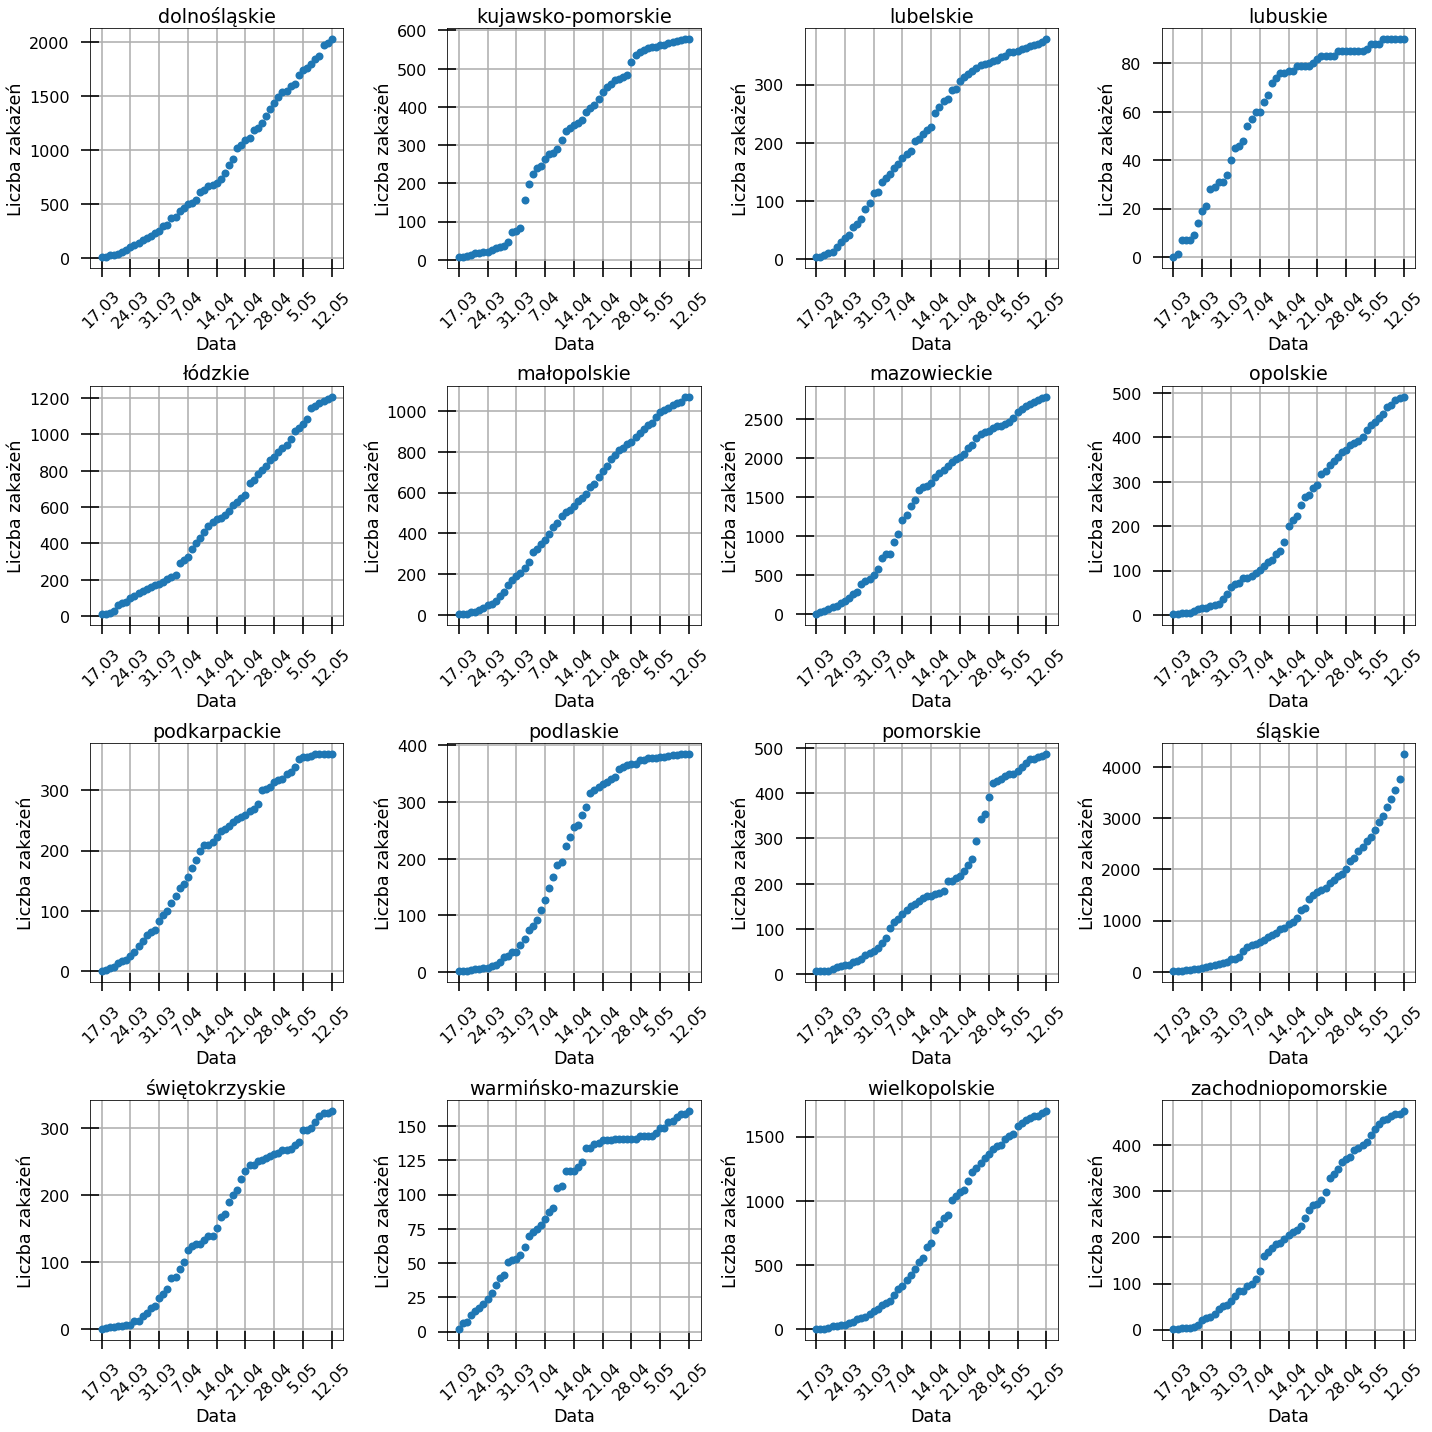

In [7]:
#Absolute values
fig, axis = plt.subplots(4,4, figsize=(20, 20), sharey=False)
for ax, region in zip(axis.flatten(), regions):
    ax.plot(df["Data"].values, df[region].values, linestyle="", marker="o", markersize=8)

    ax.set(xlabel="Data",
    ylabel="Liczba zakażeń",
    title=region)
    tick_spacing=7
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.xaxis.set_tick_params(rotation=45, direction="out")
    ax.tick_params(direction='inout', length=18, colors='k')  
    ax.grid(True)
    
plt.tight_layout()
plt.show()

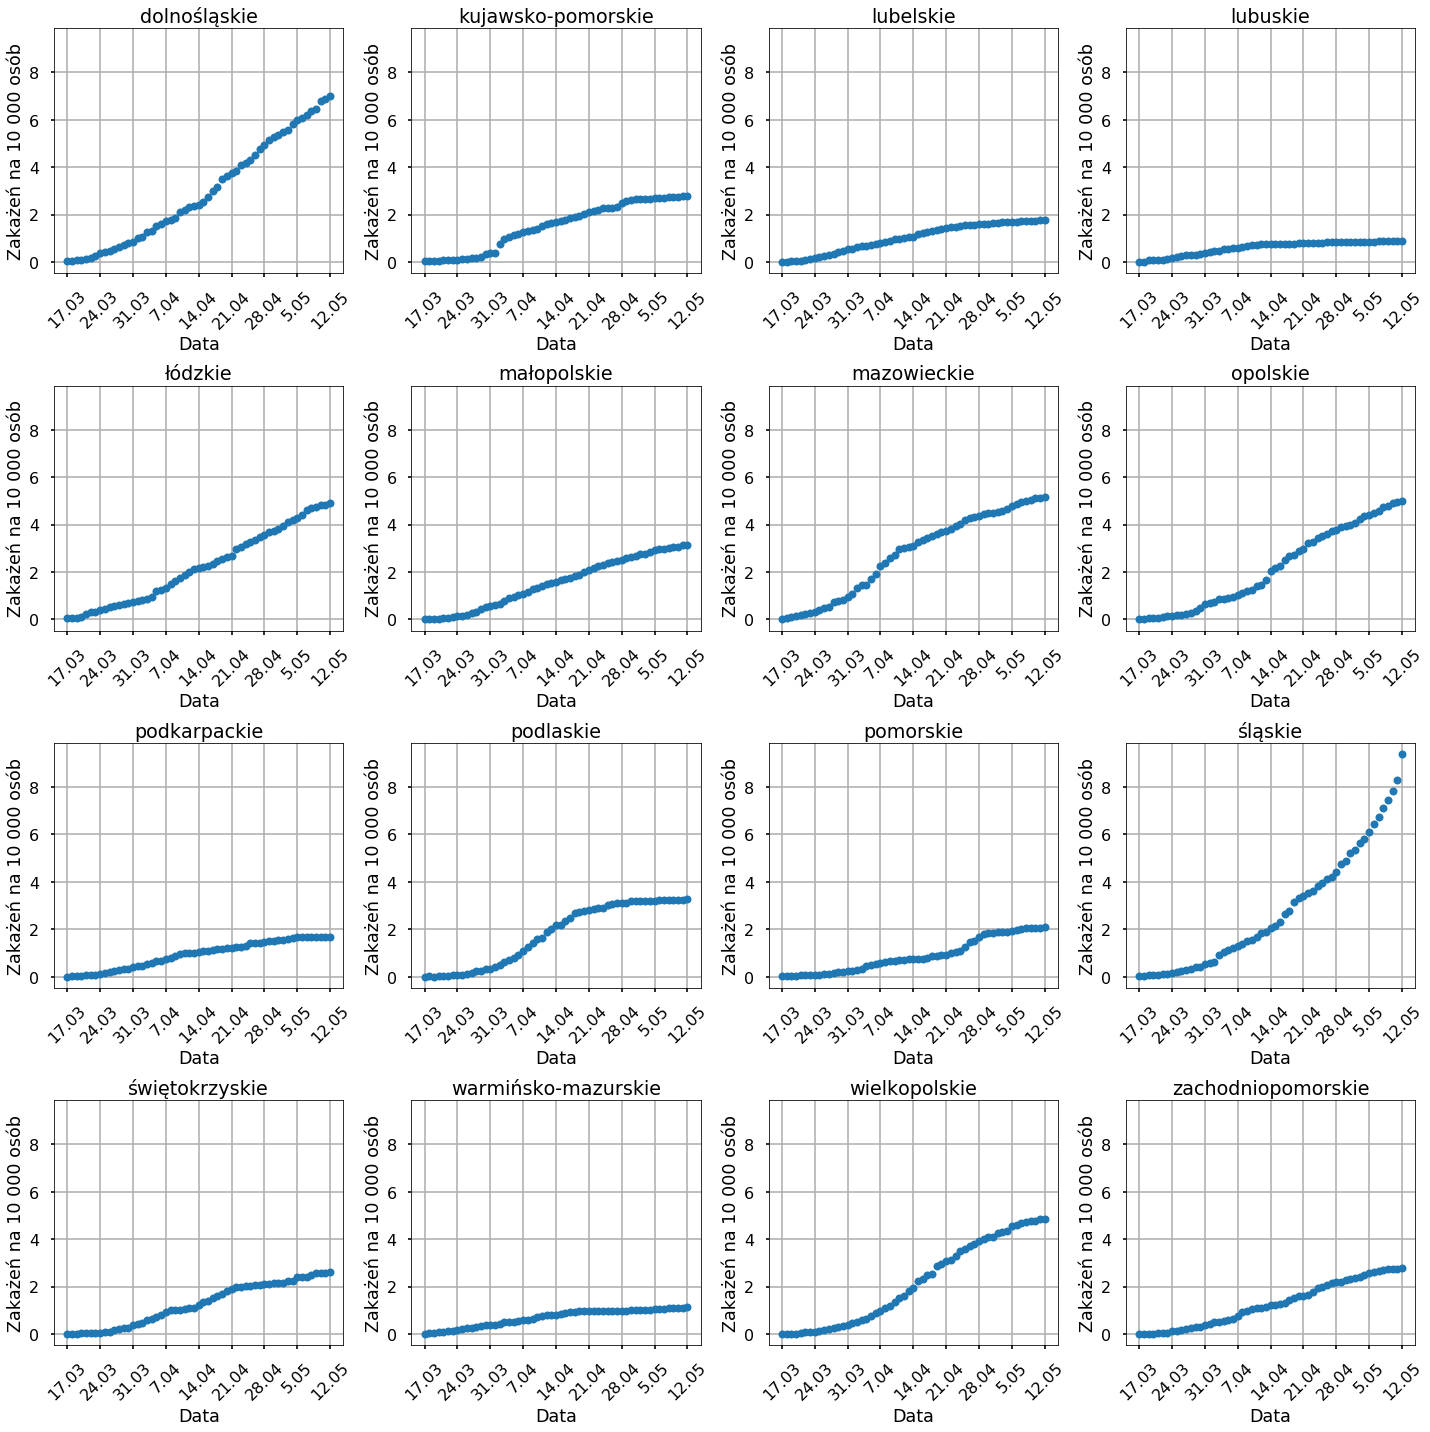

dolnośląskie 6.99
kujawsko-pomorskie 2.78
lubelskie 1.79
lubuskie 0.89
łódzkie 4.9
małopolskie 3.15
mazowieckie 5.17
opolskie 4.99
podkarpackie 1.69
podlaskie 3.26
pomorskie 2.09
śląskie 9.39
świętokrzyskie 2.62
warmińsko-mazurskie 1.13
wielkopolskie 4.86
zachodniopomorskie 2.79


In [36]:
#Per 10 000
pernum=10000
fig, axis = plt.subplots(4,4, figsize=(20, 20), sharey=True)
for ax, region in zip(axis.flatten(), regions):
    y = (df[region].values / populacje[populacje["region"] == region].population.values[0])*pernum
    ax.plot(df["Data"].values, y, linestyle="", marker="o", markersize=8)

    ax.set(xlabel="Data",
    ylabel="Zakażeń na "+"10 000"+" osób",
    title=region)
    tick_spacing=7
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.xaxis.set_tick_params(rotation=45, direction="out")
    ax.yaxis.set_tick_params(which='both', labelleft=True)

    #ax.tick_params(direction='inout', length=18, colors='k')  
    ax.grid(True)
    
fig.tight_layout()
timestamp=time.strftime("%Y_%m_%d")
fig.savefig("./regions/per_10000_"+timestamp+".png")
plt.show()

for region in regions:
    per_pernum=((df[region].values / populacje[populacje["region"] == region].population.values[0])*pernum)[-1]
    print(region, np.round(per_pernum,2))

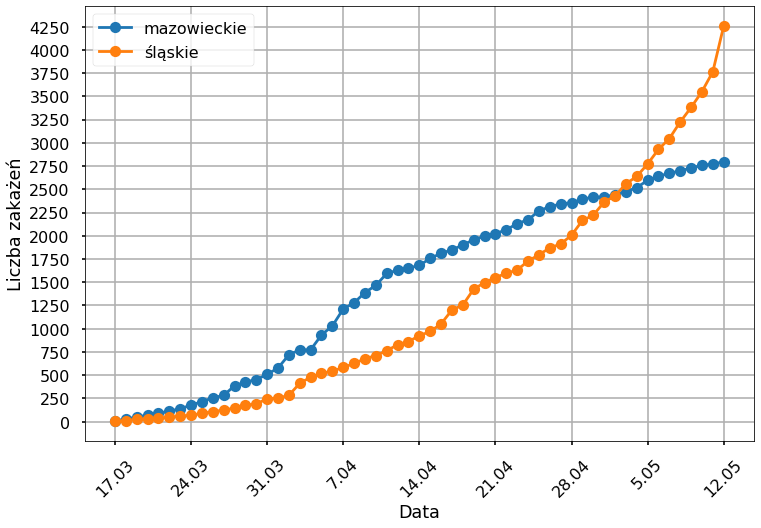

In [9]:
fig, axis = plt.subplots(1,1, figsize=(12, 8))
#axis.plot(df["Data"].values, df[regions].sum(axis=1), label="Cała Polska", linestyle="-", marker="o")
#axis.plot(df["Data"].values, df[regions_no_slask].sum(axis=1), label="Bez śląskiego", linestyle="-", marker="o")
region = "mazowieckie"
axis.plot(df["Data"].values, df[region], label=region, linestyle="-", marker="o")

region = "śląskie"
axis.plot(df["Data"].values, df[region], label=region, linestyle="-", marker="o")

axis.set(xlabel="Data",
    ylabel="Liczba zakażeń",
    title="")

tick_spacing=7
axis.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
axis.xaxis.set_tick_params(rotation=45, direction="out")
ax.tick_params(direction='inout', length=18, colors='k') 

y_tick_spacing=250
axis.yaxis.set_major_locator(ticker.MultipleLocator(y_tick_spacing))

axis.grid(True)

axis.legend()